In [86]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

def get_dfs(fsuffix):
    db_df = pd.read_csv("data/db_%s.csv" % fsuffix)
    s_df = pd.read_csv("data/shilldb_%s.csv" % fsuffix)
    
    return db_df, s_df

def plot_benchmark(fsuffix):
    d, s = get_dfs(fsuffix)
    
    plt.xlim(-10, 110)
    plt.errorbar(range(0, 110, 10), d.mean().values[1:], yerr=d.std().values[1:])
    plt.errorbar(range(0, 110, 10), s.mean().values[1:], yerr=d.std().values[1:])

    plt.show()
    
    (s.mean() - d.mean())[1:].plot()

## Insert

Plot values with error bars for 1 std

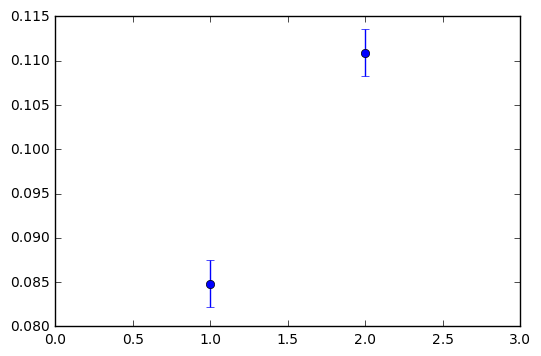

In [79]:
d, s = get_dfs("insert")

s_mean = s.mean()[1:][0]
d_mean = d.mean()[1:][0]
s_std = d.std()[1:][0]
d_std = d.std()[1:][0]

plt.errorbar([1,2], [d_mean, s_mean], yerr=[d_std, s_std], fmt='o')
plt.xlim(0,3)
plt.show()

## Delete

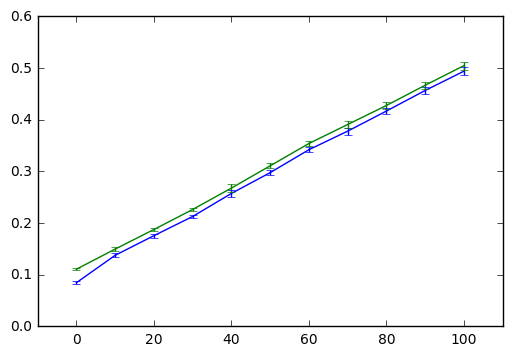

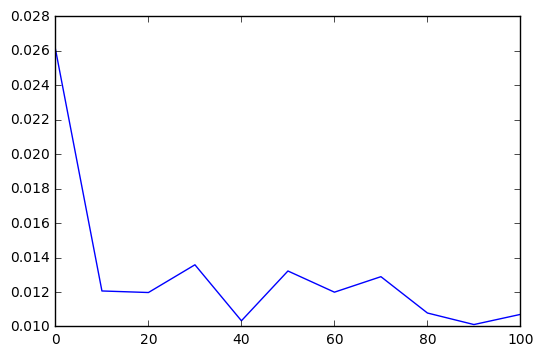

In [87]:
plot_benchmark("delete")

## Update

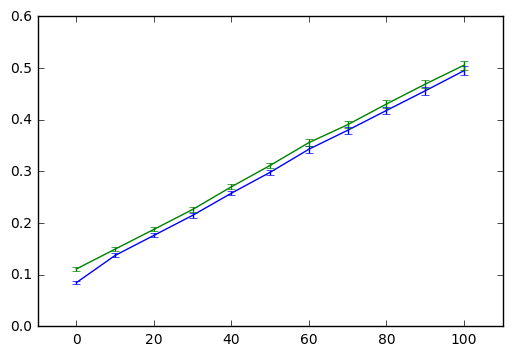

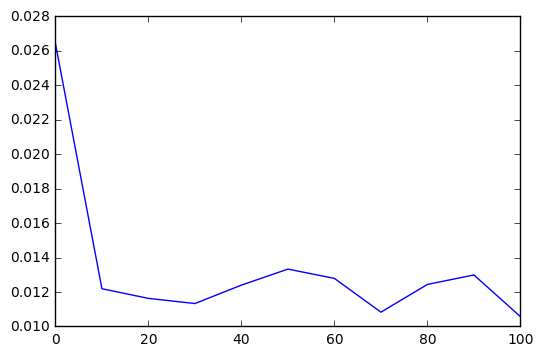

In [90]:
plot_benchmark("update2")

## Where

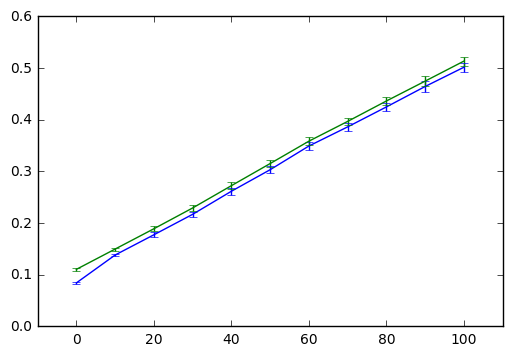

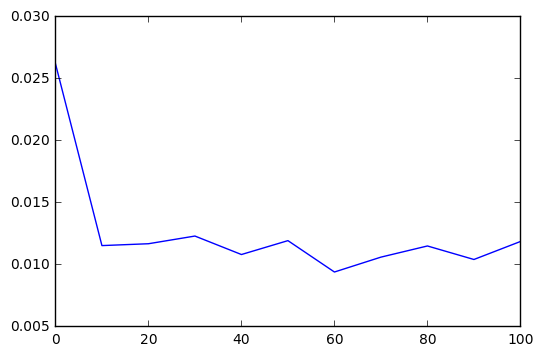

In [91]:
plot_benchmark("where")